# Projet 1 : Grocery Store

## Importing data

In [2]:
# General imports 
import logging
import pandas as pd
import numpy as np
from numpy import random
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Text processing
import gensim
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

# sklearn imports for ML (prepare, modeling and evaluate)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Importa data
df = pd.read_csv('GroceryDataset.csv')
df.head()

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
0,Bakery & Desserts,$56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...
1,Bakery & Desserts,$159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord..."
2,Bakery & Desserts,$44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...
3,Bakery & Desserts,$39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...
4,Bakery & Desserts,$59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sub Category         1757 non-null   object
 1   Price                1754 non-null   object
 2   Discount             1757 non-null   object
 3   Rating               682 non-null    object
 4   Title                1757 non-null   object
 5   Currency             1752 non-null   object
 6   Feature              1739 non-null   object
 7   Product Description  1715 non-null   object
dtypes: object(8)
memory usage: 109.9+ KB


In [4]:
df.isnull().sum() 

Sub Category              0
Price                     3
Discount                  0
Rating                 1075
Title                     0
Currency                  5
Feature                  18
Product Description      42
dtype: int64

In [5]:
df['Price'].unique()

array(['$56.99 ', '$159.99 ', '$44.99 ', '$39.99 ', '$59.99 ', '$74.99 ',
       '$29.99 ', '$62.99 ', '$299.99 ', '$54.99 ', '$89.99 ', '$49.99 ',
       '$99.99 ', '$24.99 ', '$72.99 ', '$119.99 ', '$109.99 ', '$34.99 ',
       '$27.99 ', '$21.99 ', '$20.99 ', '$19.99 ', '$439.99 ', '$9.99 ',
       '$14.99 ', '$18.99 ', '$21.49 ', '$17.99 ', '$23.99 ', '$4.99 ',
       '$12.99 ', '$32.99 ', '$13.79 ', '$23.49 ', '$22.99 ', '$8.99 ',
       '$15.99 ', '$28.99 ', '$16.49 ', '$549.99 ', '$17.49 ', '$25.99 ',
       '$11.69 ', '$69.99 ', '$21.79 ', '$37.99 ', '$139.99 ', '$41.99 ',
       '$18.49 ', '$16.99 ', '$36.99 ', '$10.99 ', '$61.99 ', '$17.59 ',
       '$11.99 ', '$24.49 ', '$10.49 ', '$9.69 ', '$8.19 ', '$9.49 ',
       '$12.49 ', '$12.69 ', '$31.99 ', '$15.49 ', '$46.99 ', '$11.49 ',
       '$16.39 ', '$13.99 ', '$38.99 ', '$26.99 ', '$13.49 ', '$14.49 ',
       '$26.69 ', '$42.99 ', '$45.99 ', '$7.99 ', '$25.69 ', '$19.49 ',
       '$12.09 ', '$10.79 ', '$17.89 ', '$28.79 ', 

In [6]:
def handle_price(price_str):
    if isinstance(price_str, str):
        price_str = price_str.replace('$', '').replace(',', '').strip()
        price_str = price_str.replace('through', '').replace('$', '').replace(',', '').strip()
    else:
        return price_str

    if '-' in price_str:
        low, high = price_str.split('-')
        return (float(low) + float(high)) / 2
    else:
        return float(price_str)
df['Price'] = df['Price'].apply(handle_price)
df['Price'].unique()

array([  56.99,  159.99,   44.99,   39.99,   59.99,   74.99,   29.99,
         62.99,  299.99,   54.99,   89.99,   49.99,   99.99,   24.99,
         72.99,  119.99,  109.99,   34.99,   27.99,   21.99,   20.99,
         19.99,  439.99,    9.99,   14.99,   18.99,   21.49,   17.99,
         23.99,    4.99,   12.99,   32.99,   13.79,   23.49,   22.99,
          8.99,   15.99,   28.99,   16.49,  549.99,   17.49,   25.99,
         11.69,   69.99,   21.79,   37.99,  139.99,   41.99,   18.49,
         16.99,   36.99,   10.99,   61.99,   17.59,   11.99,   24.49,
         10.49,    9.69,    8.19,    9.49,   12.49,   12.69,   31.99,
         15.49,   46.99,   11.49,   16.39,   13.99,   38.99,   26.99,
         13.49,   14.49,   26.69,   42.99,   45.99,    7.99,   25.69,
         19.49,   12.09,   10.79,   17.89,   28.79,   84.99,   58.49,
         20.89,    9.79,   29.89,  199.99,   47.99,   18.39,   43.99,
         33.99,   28.49,   10.29,   35.99,   48.99,   29.69,    6.59,
        149.99,  649

In [7]:
print('la colone Price contient ',df['Price'].count(),
      ' valeurs non nulles et que ',df['Price'].isnull().sum(),' valeurs nulles')

la colone Price contient  1754  valeurs non nulles et que  3  valeurs nulles


In [8]:
# Supprimer les lignes où la colonne 'Price' a une valeur nulle
df.dropna(subset=['Price'], inplace=True)

In [9]:
df['Rating'].unique()

array(['Rated 4.3 out of 5 stars based on 265 reviews.',
       'Rated 5 out of 5 stars based on 1 reviews.',
       'Rated 4.1 out of 5 stars based on 441 reviews.',
       'Rated 4.7 out of 5 stars based on 9459 reviews.',
       'Rated 4.5 out of 5 stars based on 758 reviews.',
       'Rated 4.4 out of 5 stars based on 369 reviews.',
       'Rated 4.7 out of 5 stars based on 2241 reviews.',
       'Rated 4.4 out of 5 stars based on 232 reviews.',
       'Rated 4.4 out of 5 stars based on 1679 reviews.',
       'Rated 5 out of 5 stars based on 2 reviews.',
       'Rated 4 out of 5 stars based on 357 reviews.',
       'Rated 3 out of 5 stars based on 1 reviews.',
       'Rated 4.7 out of 5 stars based on 273 reviews.',
       'Rated 4.6 out of 5 stars based on 369 reviews.',
       'Rated 4.6 out of 5 stars based on 133 reviews.',
       'Rated 4.5 out of 5 stars based on 452 reviews.', 'No Reviews',
       'Rated 4.2 out of 5 stars based on 85 reviews.',
       'Rated 1.5 out of 5 st

In [10]:
#Extract Numeric Ratings: Ratings might be in a format like '4.3 out of 5 stars'. Extract the numeric part.

df['Numeric Rating'] = df['Rating'].str.extract('(\d+\.\d+|\d+)')
df

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description,Numeric Rating
0,Bakery & Desserts,56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...,4.3
1,Bakery & Desserts,159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord...",5
2,Bakery & Desserts,44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...,4.1
3,Bakery & Desserts,39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...,4.7
4,Bakery & Desserts,59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...,4.5
...,...,...,...,...,...,...,...,...,...
1752,Snacks,23.99,No Discount,NaN,"Oberto Thin Style Smoked Sausage Stick, Cockta...",$,Cocktail Pepperoni Smoked Sausage Sticks 3...,Cocktail PepperoniSmoked Sausage Sticks3 oz ba...,NaN
1753,Snacks,49.99,No Discount,NaN,"Cheetos Crunchy, Original, 2.1 oz, 64-count",$,Made with Real Cheese,64-count2.1 oz Bags,NaN
1754,Snacks,22.99,No Discount,NaN,"Sabritas Chile & Limon Mix, Variety Pack, 30-c...",$,Chile & Limón Mix Variety Pack 30 ct Net...,8-Doritos Dinamita Chile Limón Flavored Rolled...,NaN
1755,Snacks,17.49,No Discount,NaN,"Fruit Roll-Ups, Variety Pack, 72-count",$,Variety Pack 1 Box with 72 Rolls Flavore...,Fruit Flavored Snacks\nVariety Includes: Straw...,NaN


In [11]:
df['Numeric Rating'].info()

<class 'pandas.core.series.Series'>
Index: 1754 entries, 0 to 1756
Series name: Numeric Rating
Non-Null Count  Dtype 
--------------  ----- 
615 non-null    object
dtypes: object(1)
memory usage: 27.4+ KB


In [12]:
#If there are missing or non-standard entries, decide how to handle them—either leave them as NaN, 
#fill them with a default value, or use some imputation strategy.
df['Numeric Rating'] = pd.to_numeric(df['Numeric Rating'], errors='coerce')
df

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description,Numeric Rating
0,Bakery & Desserts,56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...,4.3
1,Bakery & Desserts,159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord...",5.0
2,Bakery & Desserts,44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...,4.1
3,Bakery & Desserts,39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...,4.7
4,Bakery & Desserts,59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...,4.5
...,...,...,...,...,...,...,...,...,...
1752,Snacks,23.99,No Discount,NaN,"Oberto Thin Style Smoked Sausage Stick, Cockta...",$,Cocktail Pepperoni Smoked Sausage Sticks 3...,Cocktail PepperoniSmoked Sausage Sticks3 oz ba...,NaN
1753,Snacks,49.99,No Discount,NaN,"Cheetos Crunchy, Original, 2.1 oz, 64-count",$,Made with Real Cheese,64-count2.1 oz Bags,NaN
1754,Snacks,22.99,No Discount,NaN,"Sabritas Chile & Limon Mix, Variety Pack, 30-c...",$,Chile & Limón Mix Variety Pack 30 ct Net...,8-Doritos Dinamita Chile Limón Flavored Rolled...,NaN
1755,Snacks,17.49,No Discount,NaN,"Fruit Roll-Ups, Variety Pack, 72-count",$,Variety Pack 1 Box with 72 Rolls Flavore...,Fruit Flavored Snacks\nVariety Includes: Straw...,NaN


In [13]:
df['Numeric Rating'].info()

<class 'pandas.core.series.Series'>
Index: 1754 entries, 0 to 1756
Series name: Numeric Rating
Non-Null Count  Dtype  
--------------  -----  
615 non-null    float64
dtypes: float64(1)
memory usage: 27.4 KB


In [14]:
print("Nombre de valeurs non nulles dans la colonne Numeric rating :", df['Numeric Rating'].count())
print("Nombre de valeurs nulles dans la colonne Numeric rating:", df['Numeric Rating'].isna().sum())

Nombre de valeurs non nulles dans la colonne Numeric rating : 615
Nombre de valeurs nulles dans la colonne Numeric rating: 1139


In [15]:
df['Discount'].unique()

array(['No Discount', 'After $30 OFF', 'After $5 OFF',
       'This item is not returnable.', 'After $20 OFF', 'After $4.50 OFF',
       'After $4 OFF', 'After $2.80 OFF', 'After $8 OFF',
       'After $3.60 OFF', 'After $3 OFF', 'After $1.50 OFF',
       'After $3.30 OFF', 'After $6 OFF', 'After $2.40 OFF',
       'After $2.20 OFF', 'After $12 OFF', 'After $3.10 OFF',
       'After $5.60 OFF', 'After $2.70 OFF', 'After $10 OFF',
       'After $9.30 OFF', 'After $50 OFF', 'After $2.50 OFF',
       'After $70 OFF', 'After $60 OFF', 'After $40 - $80 OFF',
       'After $40 - $70 OFF', 'After $40 OFF', 'After $80 OFF',
       'After $3.50 OFF', 'Limit 1 Per Member', 'Limit 5 Per Member',
       'After $6.50 OFF', 'After $3.80 OFF', 'After $2.60 OFF',
       'After $7 OFF', 'After $4.10 OFF', 'After $2 OFF',
       'After $2.30 OFF'], dtype=object)

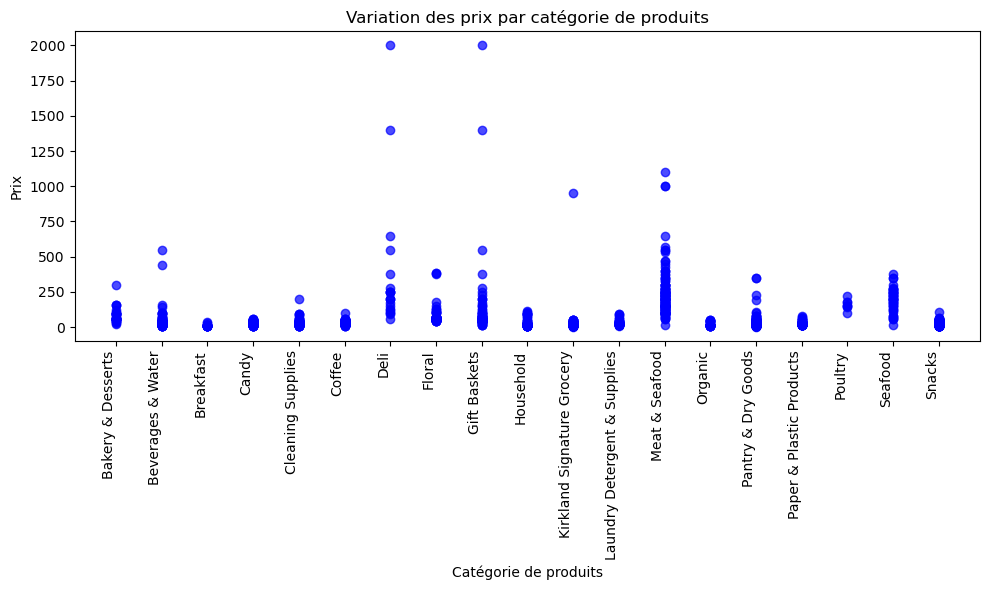

In [16]:
# Trier le DataFrame par 'Sub Category' pour une meilleure visualisation
df.sort_values(by='Sub Category', inplace=True)

# Créer le nuage de points
plt.figure(figsize=(10, 6))
plt.scatter(df['Sub Category'], df['Price'], color='blue', alpha=0.7)
plt.title('Variation des prix par catégorie de produits')
plt.xlabel('Catégorie de produits')
plt.ylabel('Prix')
plt.xticks(rotation=90, ha='right')  # Pour éviter que les étiquettes ne se chevauchent sur l'axe X
plt.tight_layout()

# Afficher le nuage de points
plt.show()

C:\Users\Maryam\AppData\Local\Temp\ipykernel_10220\643528177.py:10: UserWarning: 
The palette list has fewer values (8) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Sub Category', y='Price', hue='Sub Category', style='Sub Category', data=df, palette=palette, s=100)


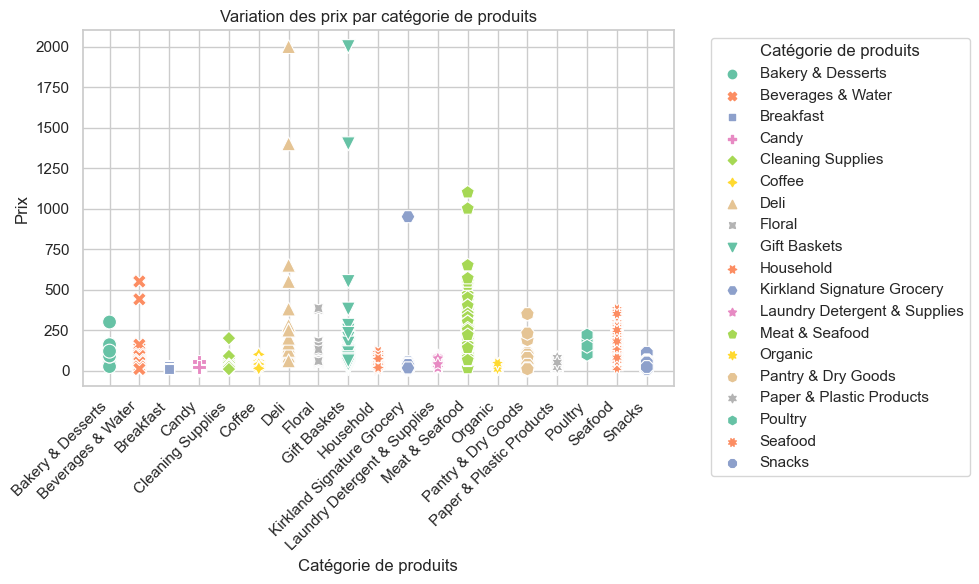

In [17]:
# Trier le DataFrame par 'Sub Category' pour une meilleure visualisation
df.sort_values(by='Sub Category', inplace=True)

# Paramètres de style
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")

# Créer le nuage de points avec couleurs et formes différenciées
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sub Category', y='Price', hue='Sub Category', style='Sub Category', data=df, palette=palette, s=100)
plt.title('Variation des prix par catégorie de produits')
plt.xlabel('Catégorie de produits')
plt.ylabel('Prix')
plt.xticks(rotation=45, ha='right')  # Pour éviter que les étiquettes ne se chevauchent sur l'axe X
plt.legend(title='Catégorie de produits', bbox_to_anchor=(1.05, 1), loc='upper left')

# Afficher le nuage de points
plt.tight_layout()
plt.show()

C:\Users\Maryam\AppData\Local\Temp\ipykernel_10220\3384704182.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Price', y='Numeric Rating', data=df, palette='rocket')


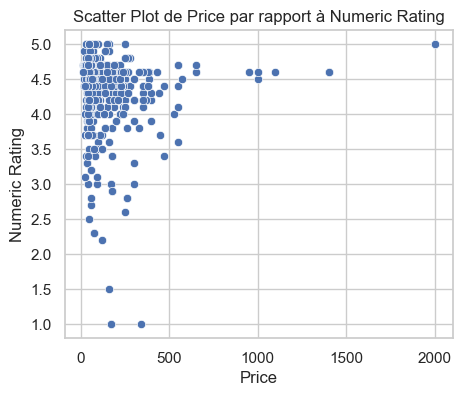

In [38]:
# Scatter plot pour la relation entre Price et Numeric Rating
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Price', y='Numeric Rating', data=df, palette='rocket')
plt.title('Scatter Plot de Price par rapport à Numeric Rating')
plt.xlabel('Price')
plt.ylabel('Numeric Rating')
plt.show()


C:\Users\Maryam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


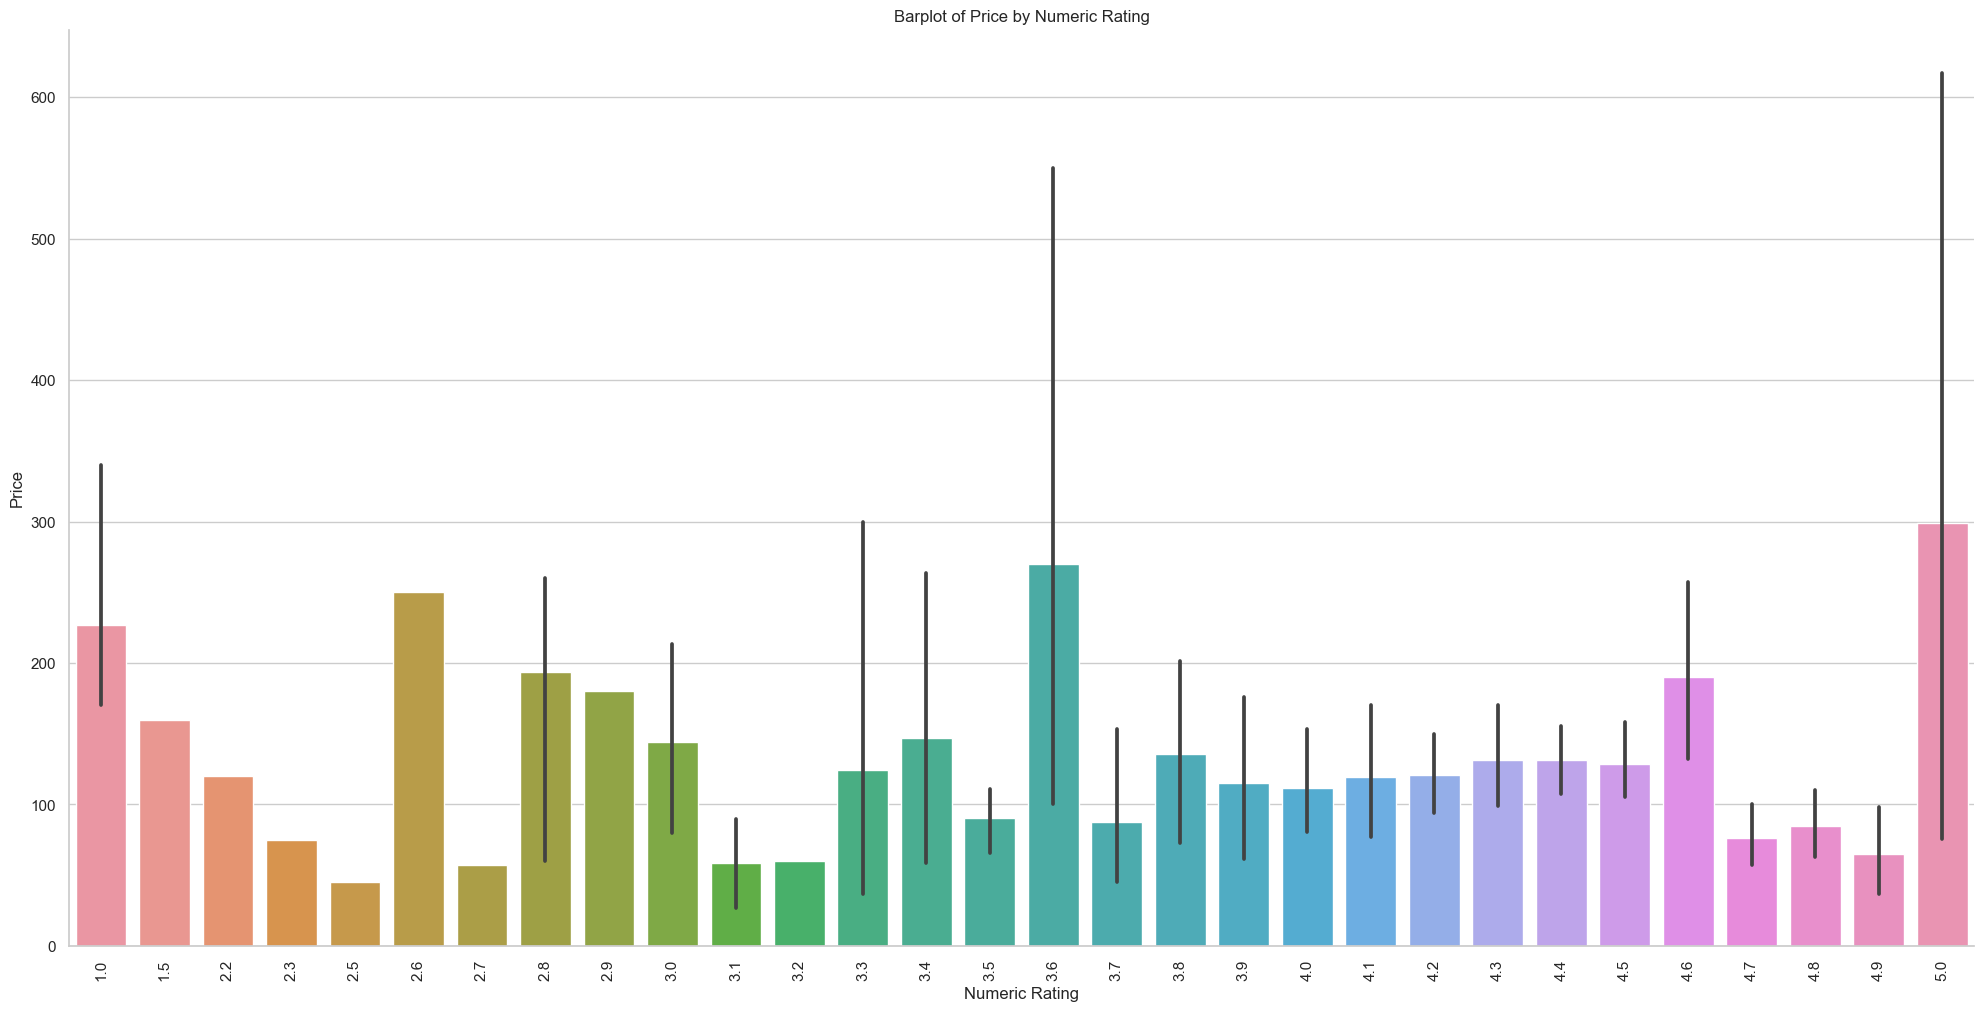

C:\Users\Maryam\AppData\Local\Temp\ipykernel_10220\2521743055.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sub Category', y='Numeric Rating', data=df, ci=None)


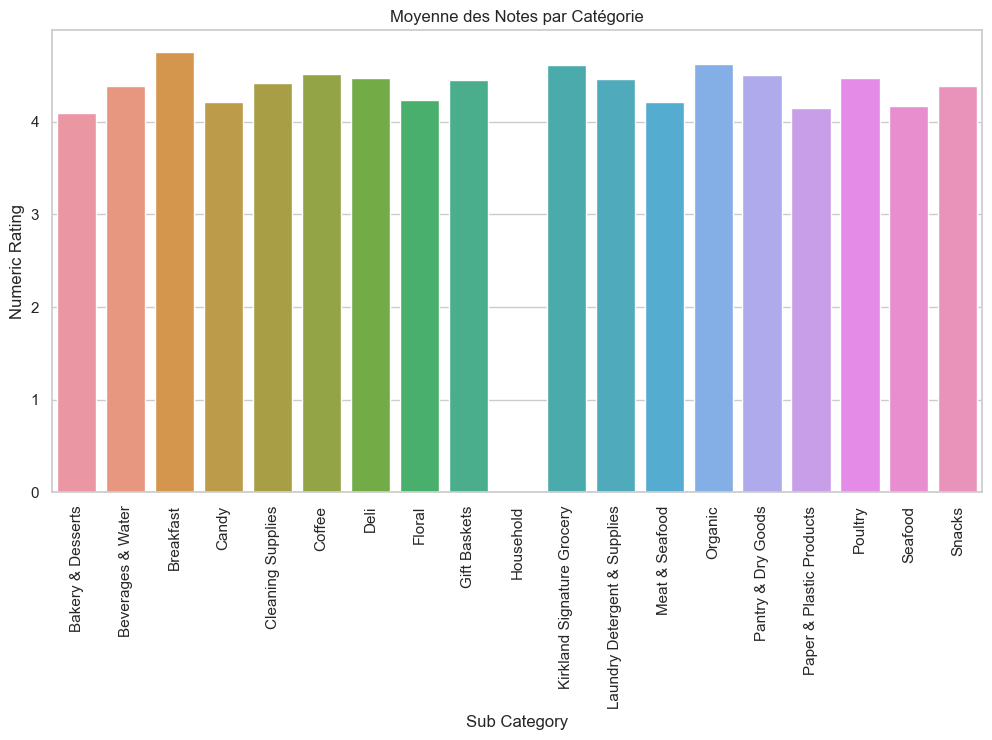

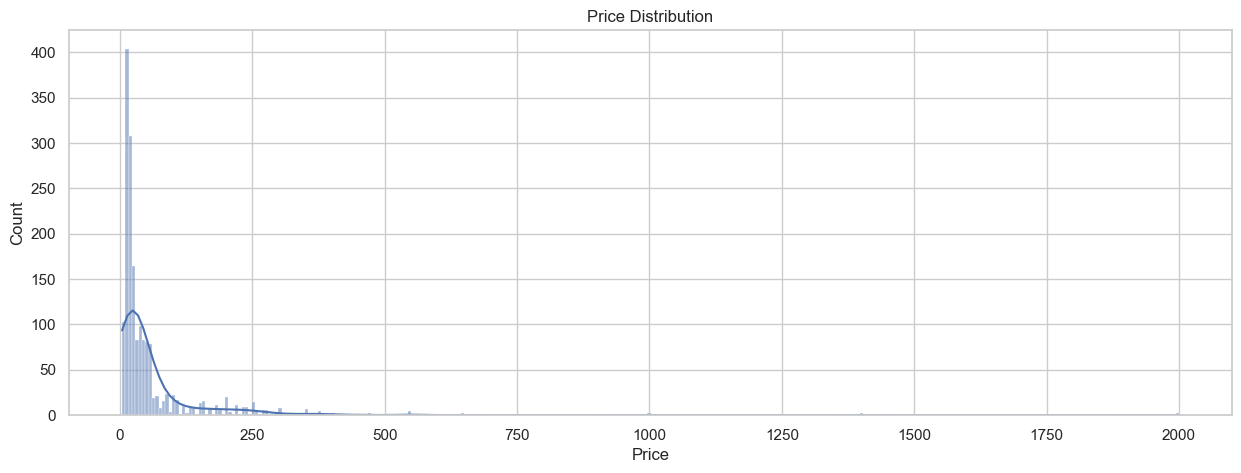

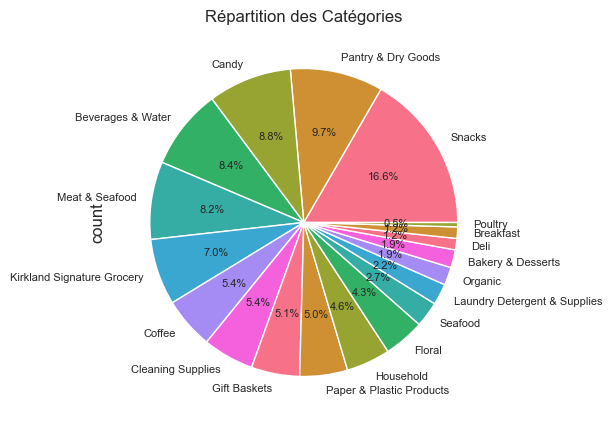

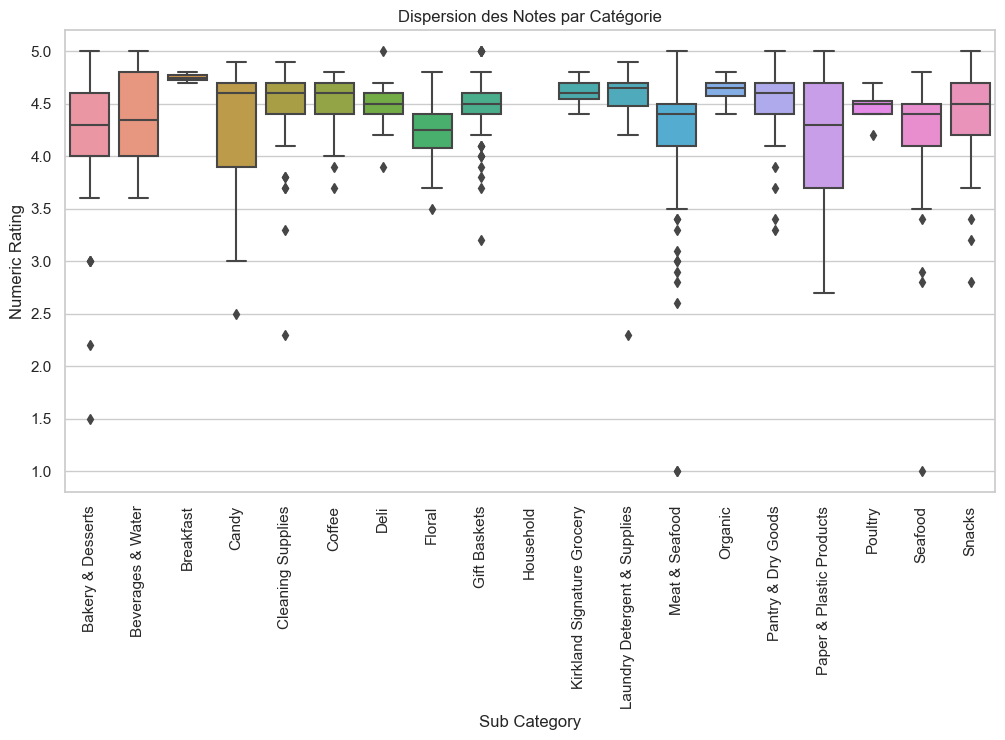

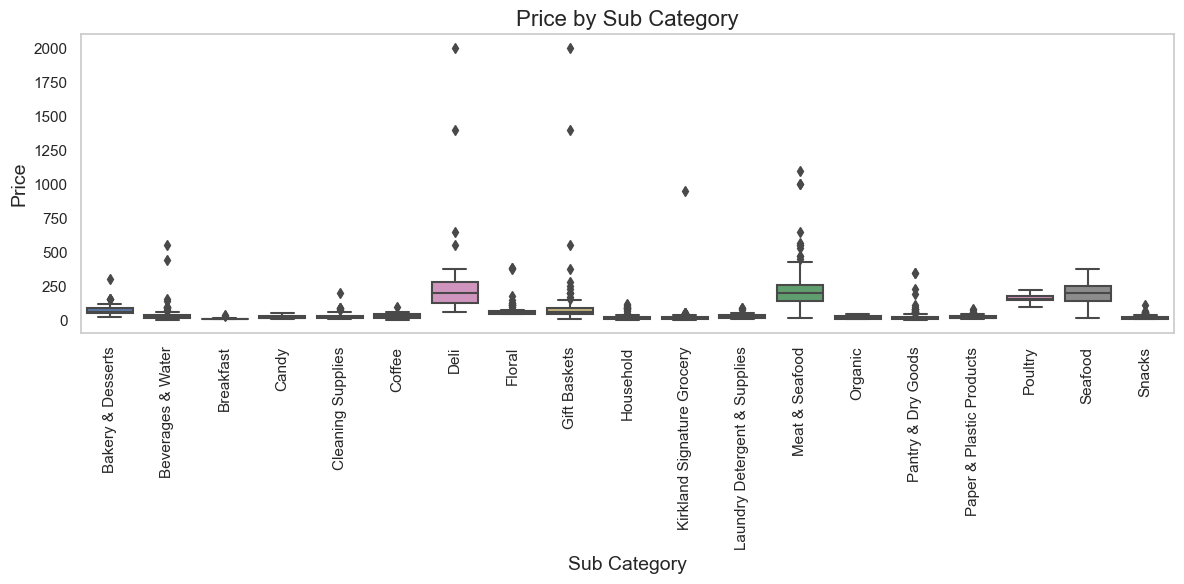

In [53]:
# Utilisation de sns.catplot pour créer un barplot
sns.catplot(x='Numeric Rating', y='Price', data=df, kind='bar', height=10, aspect=2)

# Ajout des labels et du titre
plt.xlabel('Numeric Rating')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.title('Barplot of Price by Numeric Rating')

# Affichage du catplot
plt.show()




# Diagramme à barres pour la moyenne des notes par catégorie
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub Category', y='Numeric Rating', data=df, ci=None)
plt.title('Moyenne des Notes par Catégorie')
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(15,5))
sns.histplot(data=df, x="Price", kde=True)
plt.title("Price Distribution")
plt.show()


# Diagramme à secteurs pour la répartition des catégories avec la palette 'rocket'
plt.figure(figsize=(5, 5))
df['Sub Category'].value_counts().plot.pie(autopct=lambda p: '{:.1f}%'.format(p), colors=sns.color_palette("husl", 8), textprops={'fontsize': 8})
plt.title('Répartition des Catégories')
plt.show()



# Diagramme en boîte pour les notes par catégorie
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sub Category', y='Numeric Rating', data=df)
plt.title('Dispersion des Notes par Catégorie')
plt.xticks(rotation=90)
plt.show()

#dispersion price par subcategory
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sub Category', y='Price', data=df, palette='deep')

plt.xticks(rotation=90)
plt.xlabel('Sub Category', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price by Sub Category', fontsize=16)
plt.grid(axis='y')

plt.tight_layout()
plt.show()




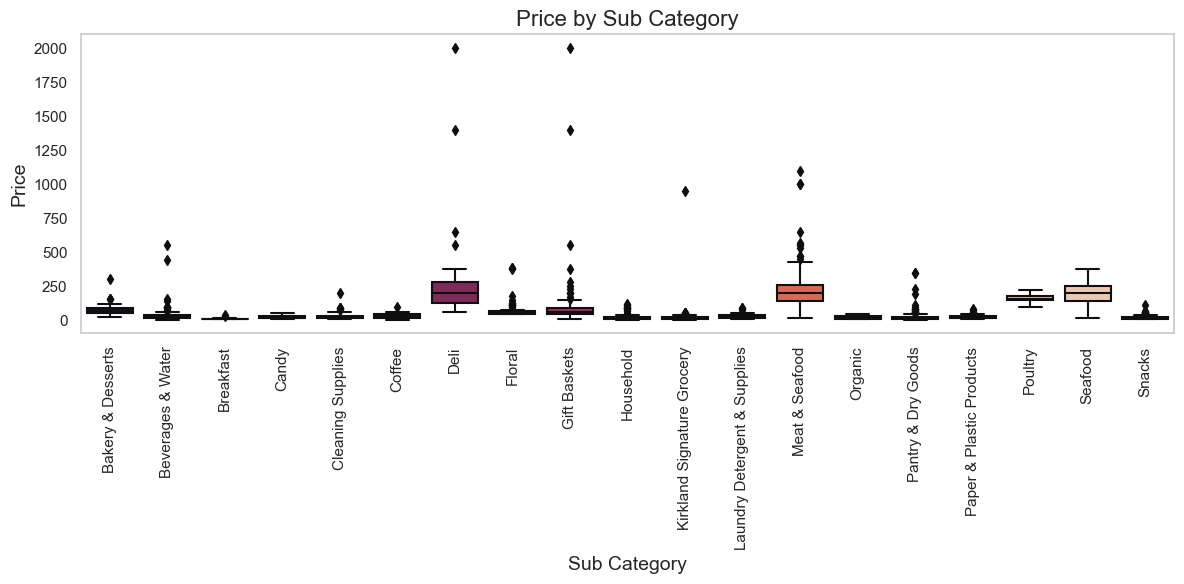

In [40]:
# Dispersion price par subcategory avec la palette 'rocket'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sub Category', y='Price', data=df, palette='rocket')

plt.xticks(rotation=90)
plt.xlabel('Sub Category', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price by Sub Category', fontsize=16)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

C:\Users\Maryam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


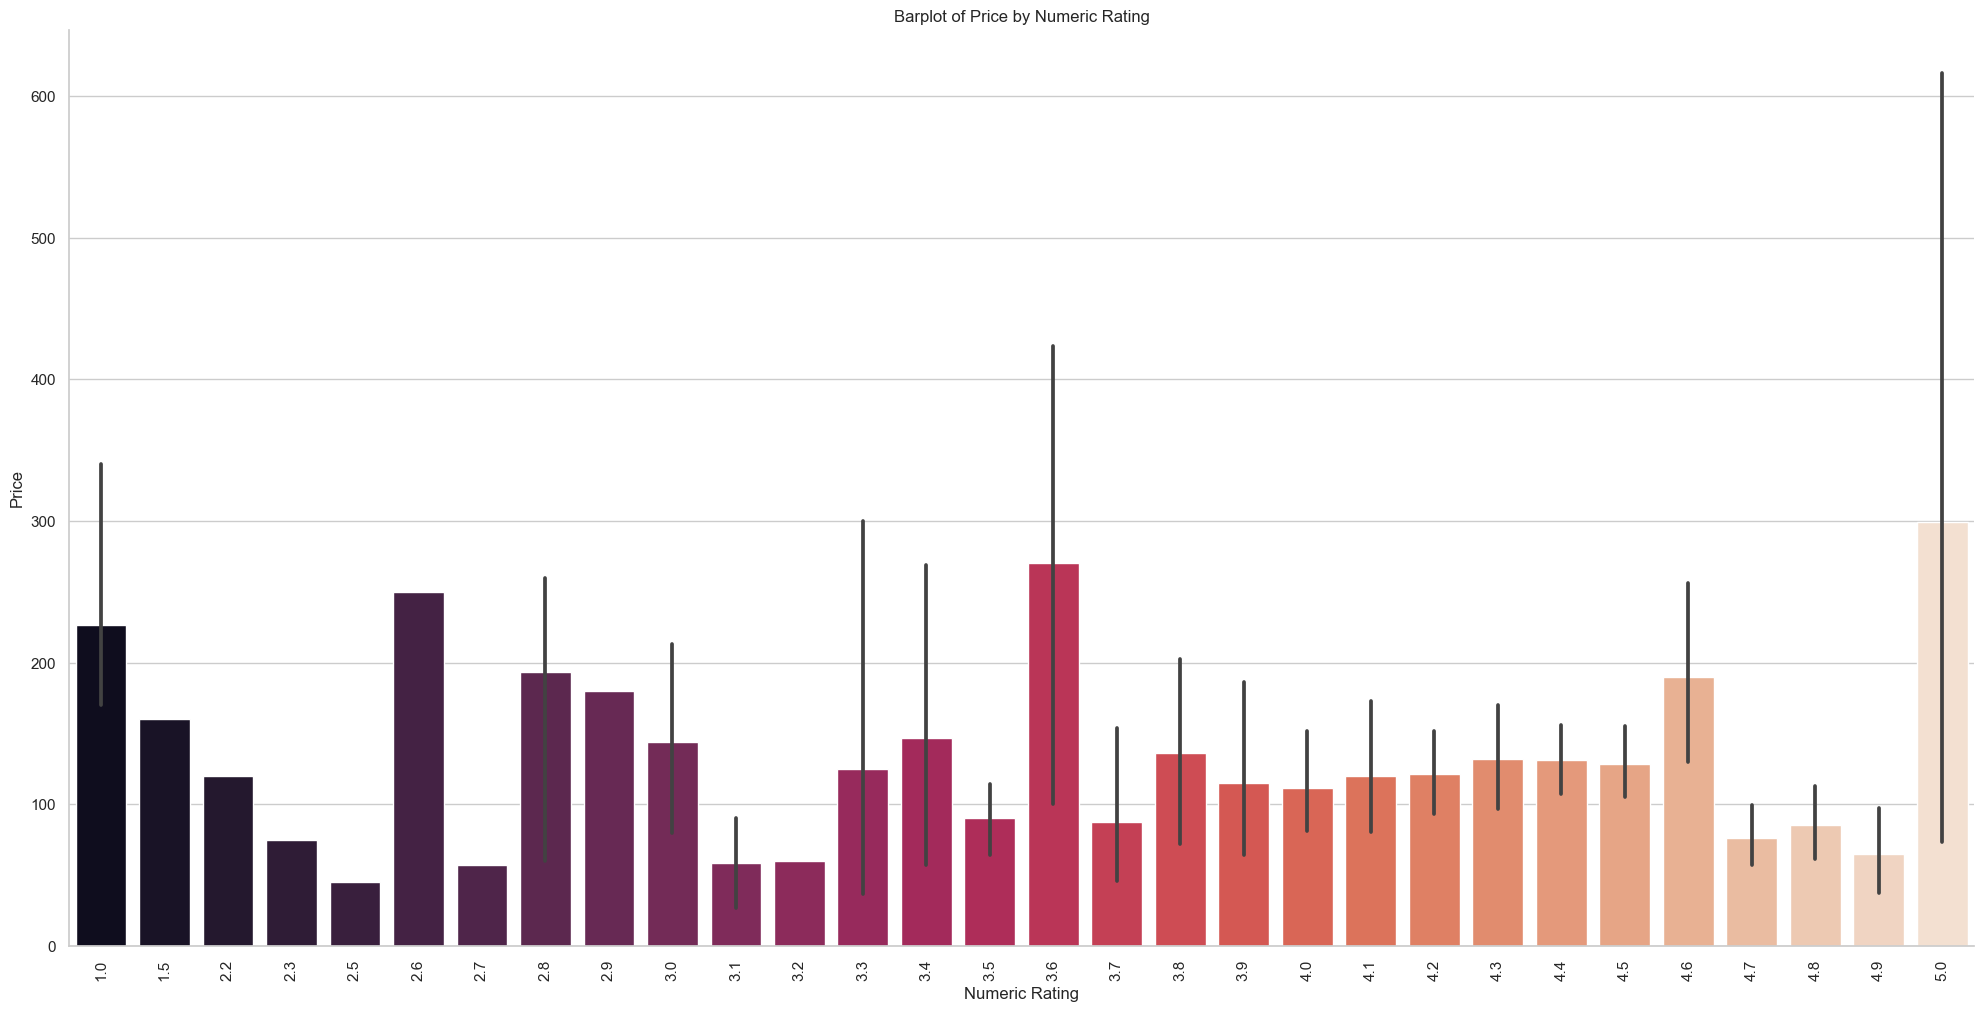

C:\Users\Maryam\AppData\Local\Temp\ipykernel_10220\4043363365.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sub Category', y='Numeric Rating', data=df, ci=None, palette=palette_rocket)


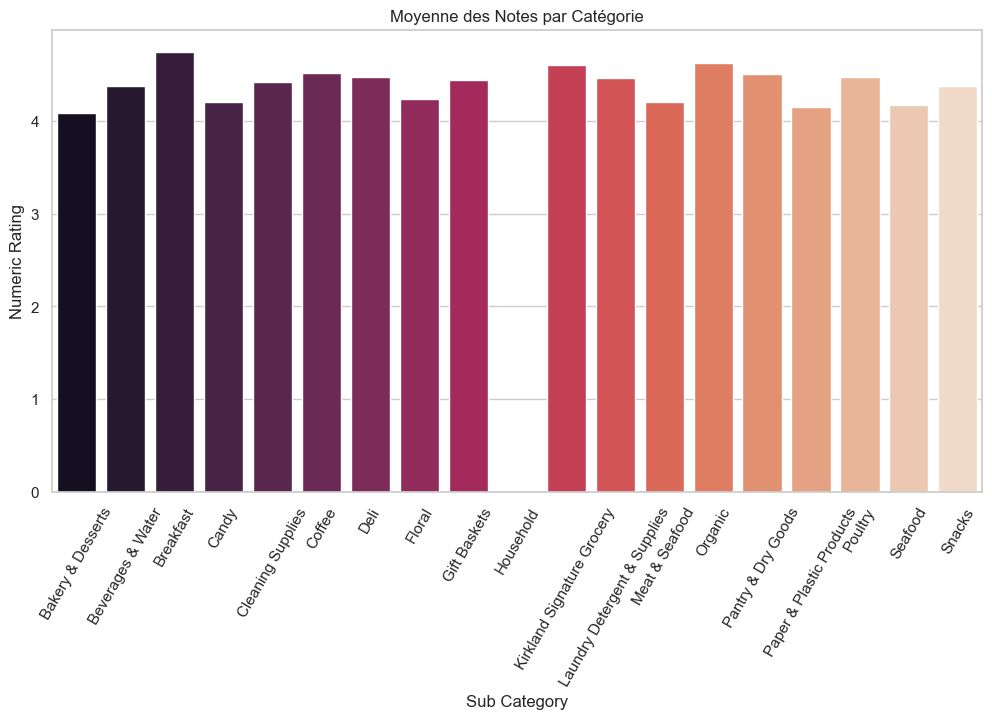

C:\Users\Maryam\AppData\Local\Temp\ipykernel_10220\4043363365.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Price'], bins=20, kde=True, palette=palette_rocket)


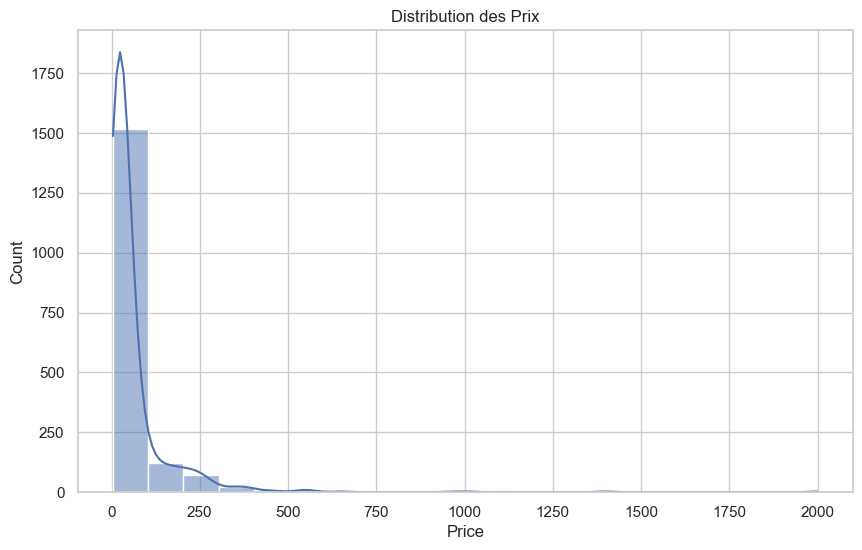

TypeError: Axes.pie() got an unexpected keyword argument 'palette'

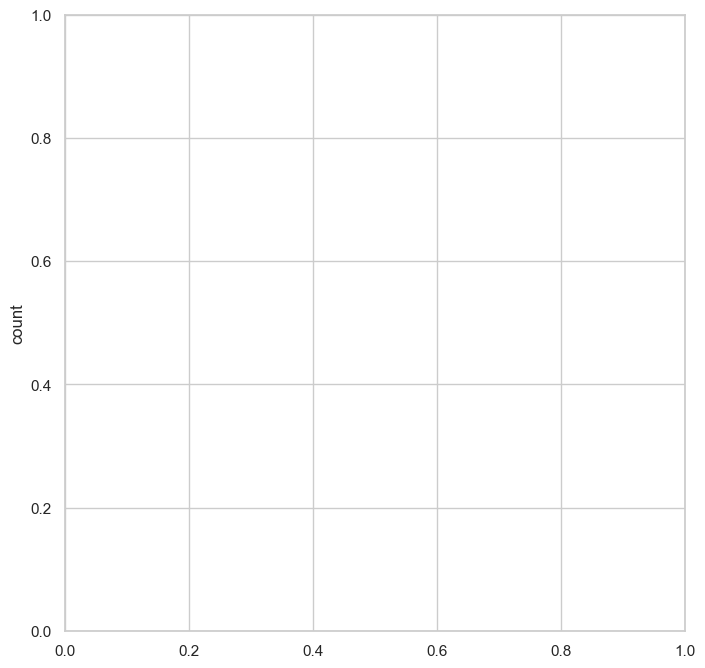

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Définir une palette de couleurs à utiliser (dans ce cas, 'rocket')
palette_rocket = 'rocket'

# Utilisation de sns.catplot pour créer un barplot
sns.catplot(x='Numeric Rating', y='Price', data=df, kind='bar', height=10, aspect=2, palette=palette_rocket)

# Ajout des labels et du titre
plt.xlabel('Numeric Rating')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.title('Barplot of Price by Numeric Rating')

# Affichage du catplot
plt.show()

# Diagramme à barres pour la moyenne des notes par catégorie
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub Category', y='Numeric Rating', data=df, ci=None, palette=palette_rocket)
plt.title('Moyenne des Notes par Catégorie')
plt.xticks(rotation=60)
plt.show()

# Histogramme pour la distribution des prix
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True, palette=palette_rocket)
plt.title('Distribution des Prix')
plt.show()

# Diagramme à secteurs pour la répartition des catégories
plt.figure(figsize=(8, 8))
df['Sub Category'].value_counts().plot.pie(autopct='%1.1f%%', palette=palette_rocket)
plt.title('Répartition des Catégories')
plt.show()

# Diagramme en boîte pour les notes par catégorie
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sub Category', y='Numeric Rating', data=df, palette=palette_rocket)
plt.title('Dispersion des Notes par Catégorie')
plt.xticks(rotation=90)
plt.show()

# Dispersion price par subcategory
plt.figure(figsize=(16, 8))
sns.boxplot(x='Sub Category', y='Price', data=df, palette=palette_rocket)

plt.xticks(rotation=90)
plt.xlabel('Sub Category', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price by Sub Category', fontsize=16)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


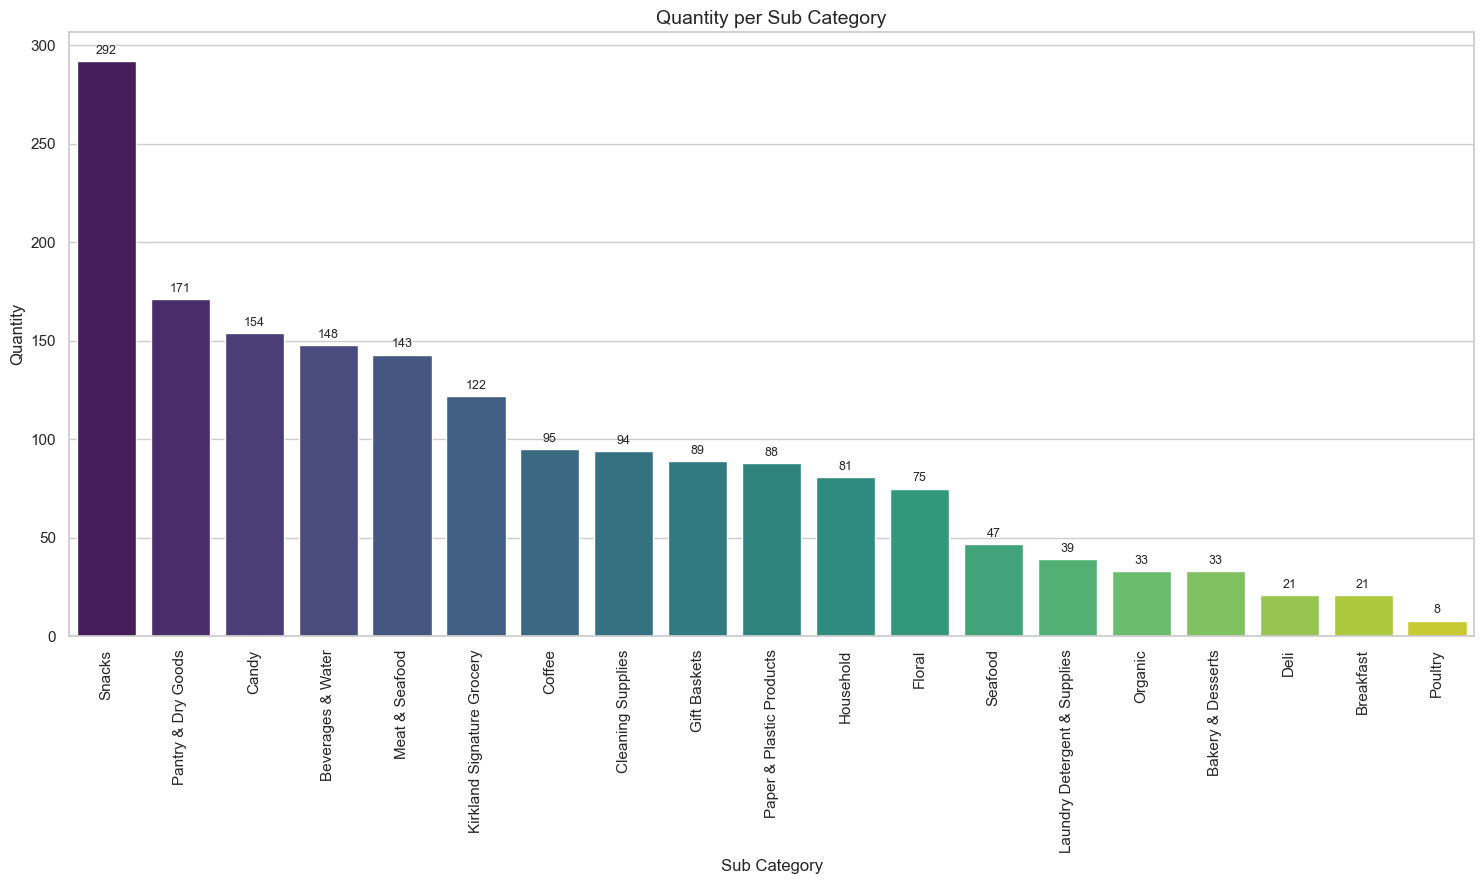

In [49]:
#quantity per subcategory
total_per_subcategory = df.groupby('Sub Category')['Price'].count().reset_index()

total_per_subcategory = total_per_subcategory.rename(columns={'Price': 'Quantity'})

sorted_subcategories_by_quantity = total_per_subcategory.sort_values('Quantity', ascending=False)

plt.figure(figsize=(15, 9))
ax = sns.barplot(data=sorted_subcategories_by_quantity, x='Sub Category', y='Quantity', palette='viridis')

plt.xticks(rotation=90)

for bar in ax.patches:
    ax.annotate(f'{bar.get_height():,.0f}',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom',
                fontsize=9, xytext=(0, 3),
                textcoords='offset points')

plt.xlabel('Sub Category', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.title('Quantity per Sub Category', fontsize=14)

plt.tight_layout()

plt.show()

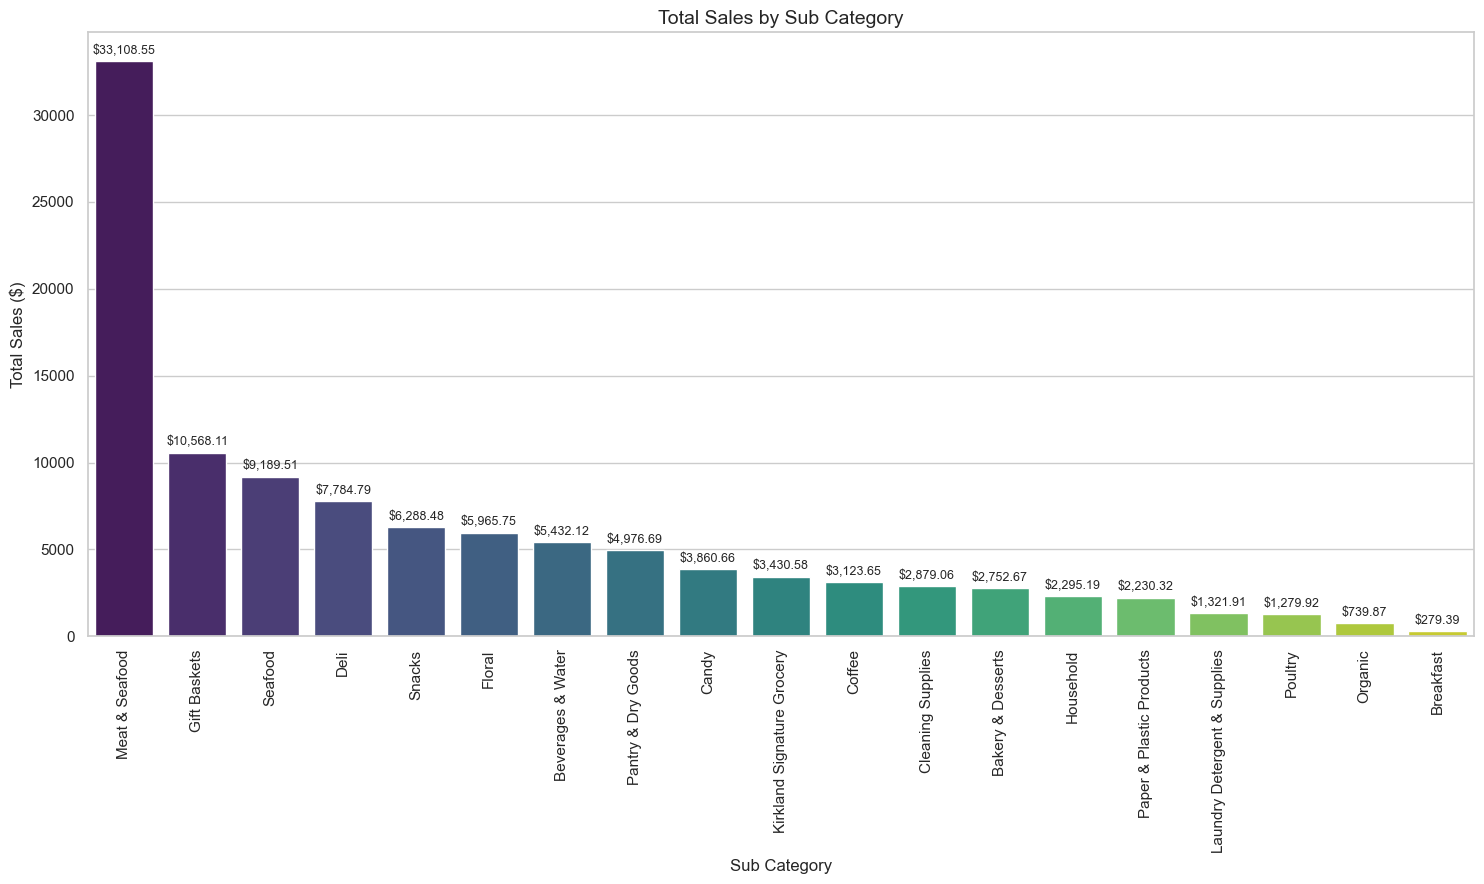

In [27]:
#total sales by subcategory
total_sales_per_subcategory = df.groupby('Sub Category')['Price'].sum().reset_index()

sorted_subcategories_by_sales = total_sales_per_subcategory.sort_values('Price', ascending=False)

plt.figure(figsize=(15, 9))
ax = sns.barplot(data=sorted_subcategories_by_sales, x='Sub Category', y='Price', palette='viridis')

plt.xticks(rotation=90)

for bar in ax.patches:
    ax.annotate(f'${bar.get_height():,.2f}',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom',
                fontsize=9, xytext=(0, 3),
                textcoords='offset points')

plt.xlabel('Sub Category', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.title('Total Sales by Sub Category', fontsize=14)

plt.tight_layout()

plt.show()

In [95]:
# Count the number of non-NaN values in the 'Rating' column for each category
nan_counts_by_category = df.groupby('Sub Category')['Numeric Rating'].apply(lambda x: x.count())

# Sort the counts for better visualization
sorted_nan_counts = nan_counts_by_category.sort_values(ascending=False)

print(sorted_nan_counts)

Sub Category
Meat & Seafood                  129
Gift Baskets                     75
Floral                           56
Pantry & Dry Goods               44
Seafood                          41
Snacks                           37
Cleaning Supplies                37
Coffee                           37
Bakery & Desserts                29
Beverages & Water                24
Deli                             20
Kirkland Signature Grocery       19
Candy                            19
Laundry Detergent & Supplies     16
Paper & Plastic Products         14
Organic                           8
Poultry                           8
Breakfast                         2
Household                         0
Name: Numeric Rating, dtype: int64


In [96]:
df.drop(df[df['Sub Category'] == 'Household'].index, inplace=True)

In [97]:
#### Verification
# Count the number of non-NaN values in the 'Rating' column for each category
nan_counts_by_category = df.groupby('Sub Category')['Numeric Rating'].apply(lambda x: x.count())

# Sort the counts for better visualization
sorted_nan_counts = nan_counts_by_category.sort_values(ascending=False)

print(sorted_nan_counts)

Sub Category
Meat & Seafood                  129
Gift Baskets                     75
Floral                           56
Pantry & Dry Goods               44
Seafood                          41
Snacks                           37
Cleaning Supplies                37
Coffee                           37
Bakery & Desserts                29
Beverages & Water                24
Deli                             20
Candy                            19
Kirkland Signature Grocery       19
Laundry Detergent & Supplies     16
Paper & Plastic Products         14
Organic                           8
Poultry                           8
Breakfast                         2
Name: Numeric Rating, dtype: int64


In [98]:
# Calculer la moyenne de chaque catégorie 
category_means = df.groupby('Sub Category')['Numeric Rating'].mean()

# Remplir les valeurs nulles avec la moyenne respective de chaque catégorie
df['Numeric Rating'] = df.apply(lambda row: category_means[row['Sub Category']] if pd.isnull(row['Numeric Rating']) else row['Numeric Rating'], axis=1)
df

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description,Numeric Rating
0,Bakery & Desserts,56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...,4.300000
1,Bakery & Desserts,159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord...",5.000000
2,Bakery & Desserts,44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...,4.100000
3,Bakery & Desserts,39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...,4.700000
4,Bakery & Desserts,59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...,4.500000
...,...,...,...,...,...,...,...,...,...
1752,Snacks,23.99,No Discount,NaN,"Oberto Thin Style Smoked Sausage Stick, Cockta...",$,Cocktail Pepperoni Smoked Sausage Sticks 3...,Cocktail PepperoniSmoked Sausage Sticks3 oz ba...,4.383784
1753,Snacks,49.99,No Discount,NaN,"Cheetos Crunchy, Original, 2.1 oz, 64-count",$,Made with Real Cheese,64-count2.1 oz Bags,4.383784
1754,Snacks,22.99,No Discount,NaN,"Sabritas Chile & Limon Mix, Variety Pack, 30-c...",$,Chile & Limón Mix Variety Pack 30 ct Net...,8-Doritos Dinamita Chile Limón Flavored Rolled...,4.383784
1755,Snacks,17.49,No Discount,NaN,"Fruit Roll-Ups, Variety Pack, 72-count",$,Variety Pack 1 Box with 72 Rolls Flavore...,Fruit Flavored Snacks\nVariety Includes: Straw...,4.383784


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1673 entries, 0 to 1756
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sub Category         1673 non-null   object 
 1   Price                1673 non-null   float64
 2   Discount             1673 non-null   object 
 3   Rating               680 non-null    object 
 4   Title                1673 non-null   object 
 5   Currency             1671 non-null   object 
 6   Feature              1670 non-null   object 
 7   Product Description  1632 non-null   object 
 8   Numeric Rating       1673 non-null   float64
 9   Cluster              1673 non-null   int32  
 10  Has_Discount         1673 non-null   int64  
 11  Discount Group       1673 non-null   object 
 12  Discount_Group       1673 non-null   object 
 13  Discount Amount      1673 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(9)
memory usage: 189.5+ KB


In [20]:
# Supprimer les colonnes non numériques pour le pairplot
df_numeric = df

# Remplacer les valeurs manquantes dans la colonne 'Rating' par la moyenne
df_numeric['Rating'].fillna(df_numeric['Rating'].mean(), inplace=True)

# Créer le pairplot
sns.pairplot(df_numeric)
plt.show()

TypeError: can only concatenate str (not "int") to str

C:\Users\Maryam\AppData\Local\Temp\ipykernel_10220\3160980947.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sub Category', y='Numeric Rating', data=df, ci=None)


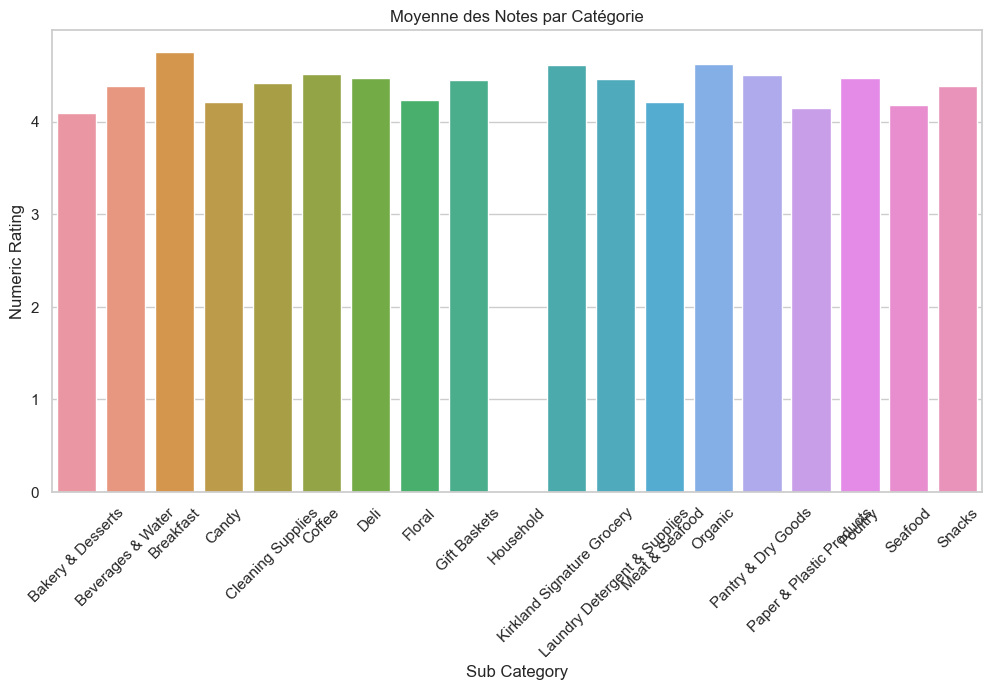

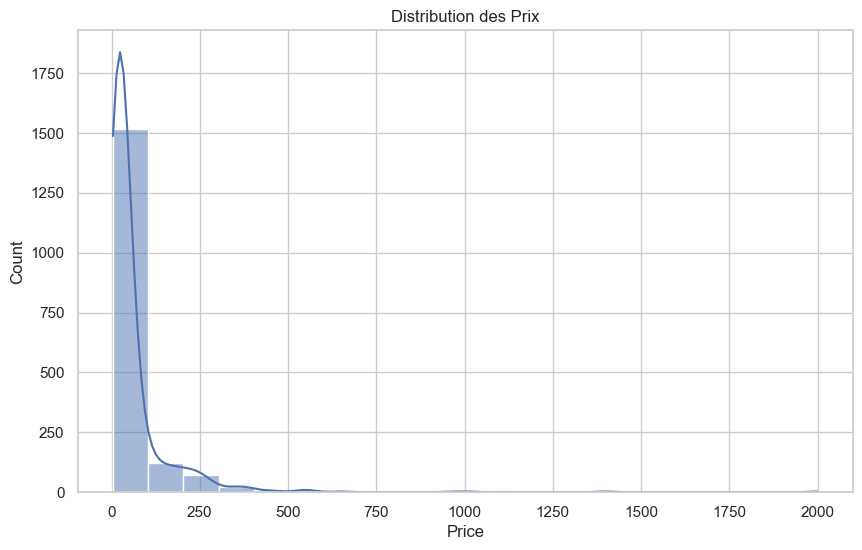

C:\Users\Maryam\AppData\Local\Temp\ipykernel_10220\3160980947.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sub Category', y='Numeric Rating', data=df, ci=None, estimator=lambda x: max(x))


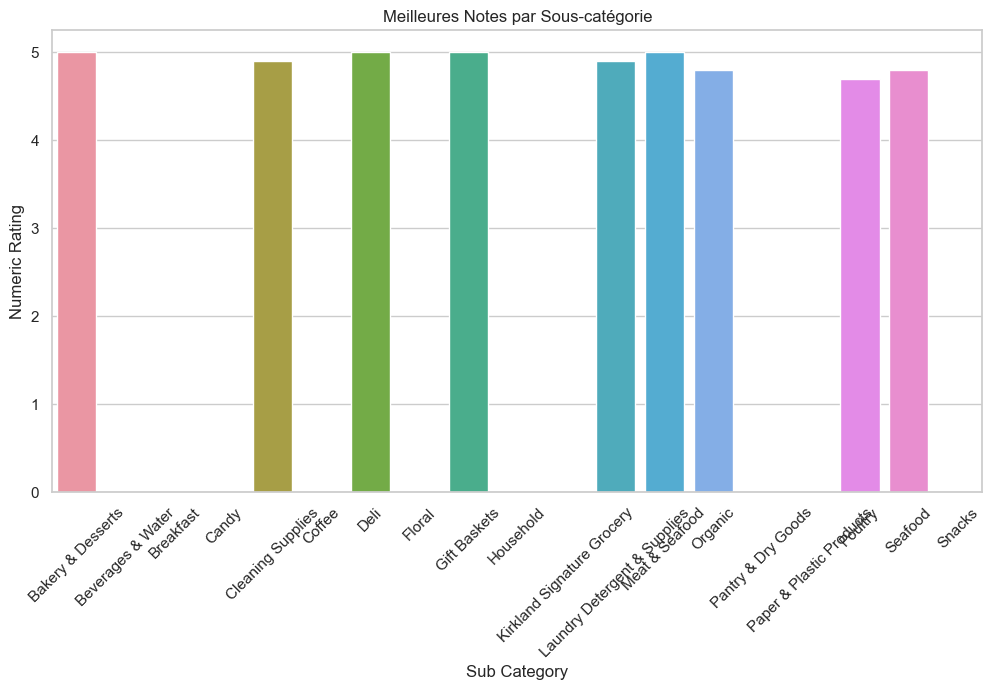

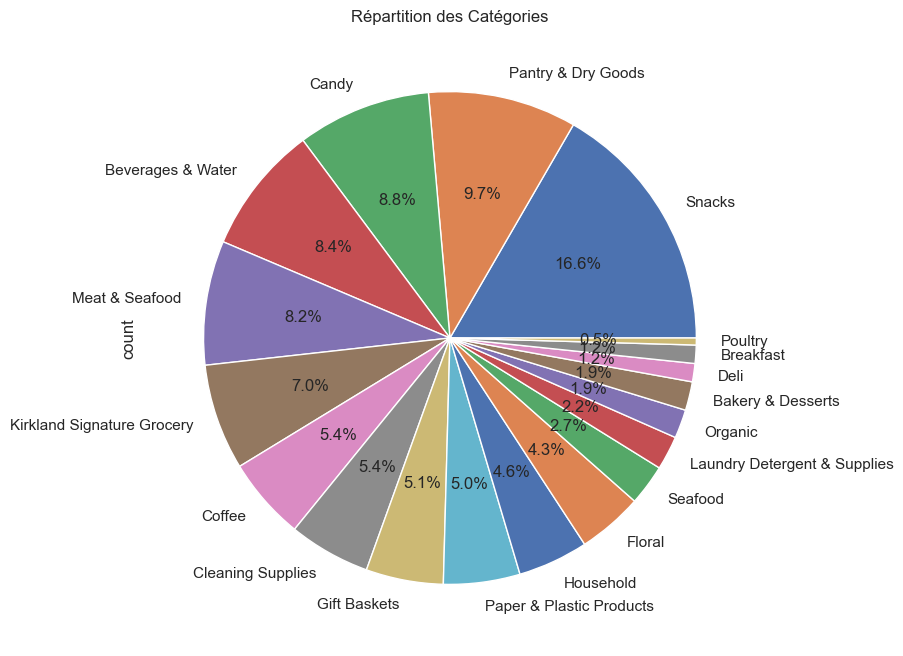

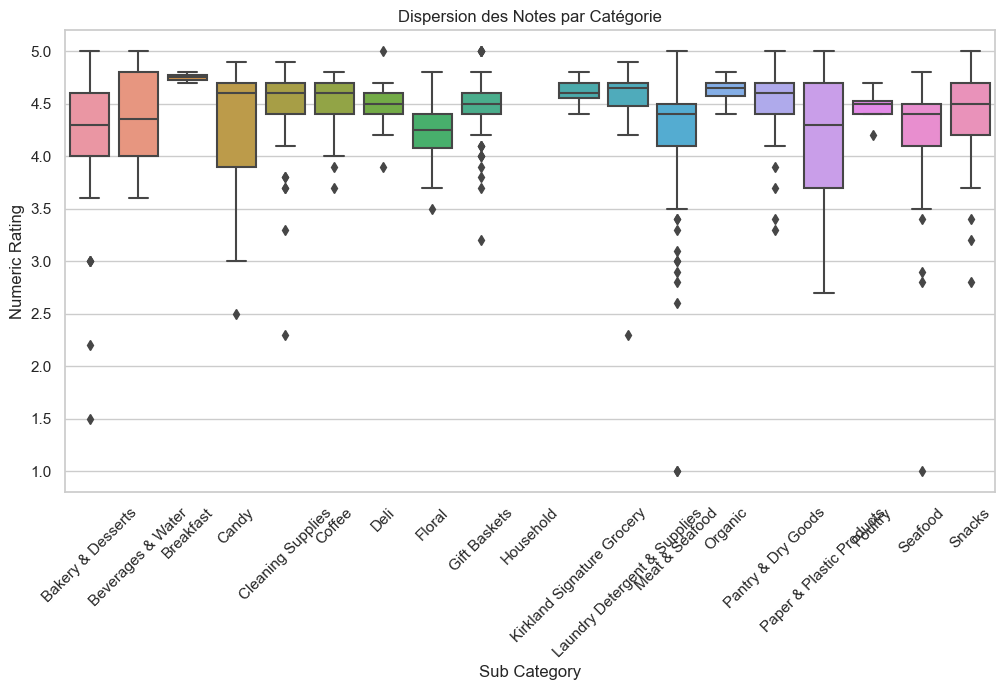

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Diagramme à barres pour la moyenne des notes par catégorie
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub Category', y='Numeric Rating', data=df, ci=None)
plt.title('Moyenne des Notes par Catégorie')
plt.xticks(rotation=45)
plt.show()


# Histogramme pour la distribution des prix
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution des Prix')
plt.show()

# Diagramme à barres pour les sous-catégories les mieux notées
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub Category', y='Numeric Rating', data=df, ci=None, estimator=lambda x: max(x))
plt.title('Meilleures Notes par Sous-catégorie')
plt.xticks(rotation=45)
plt.show()

# Diagramme à secteurs pour la répartition des catégories
plt.figure(figsize=(8, 8))
df['Sub Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Répartition des Catégories')
plt.show()

# Diagramme en boîte pour les notes par catégorie
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sub Category', y='Numeric Rating', data=df)
plt.title('Dispersion des Notes par Catégorie')
plt.xticks(rotation=45)
plt.show()


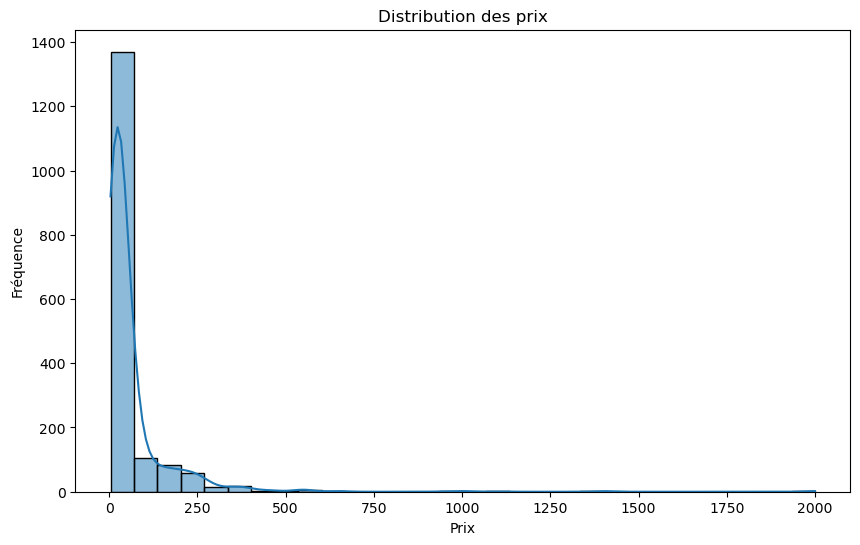

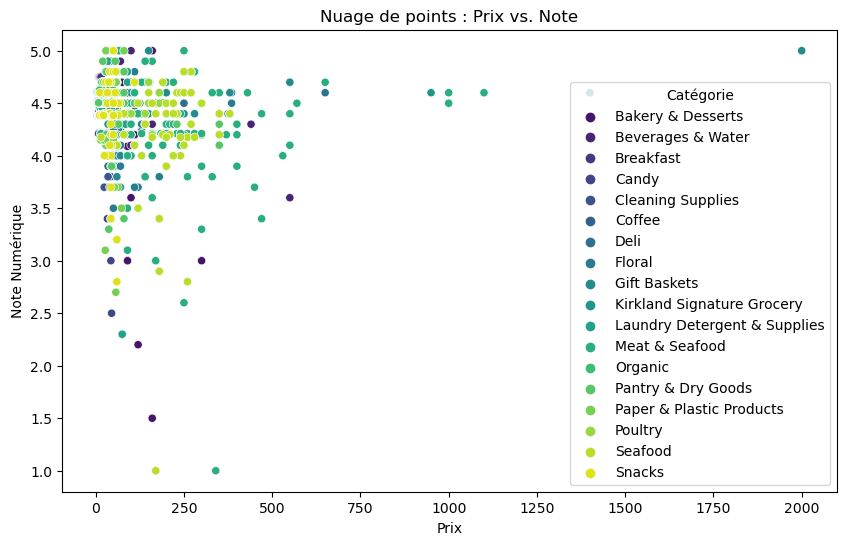

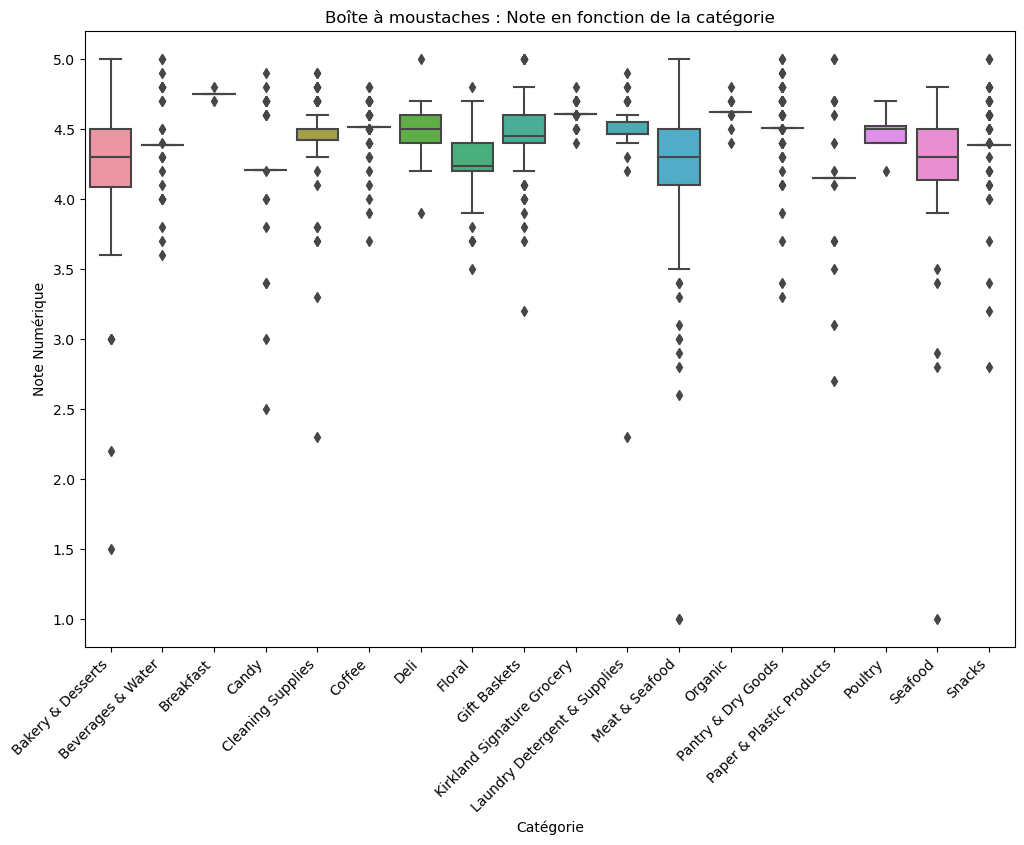

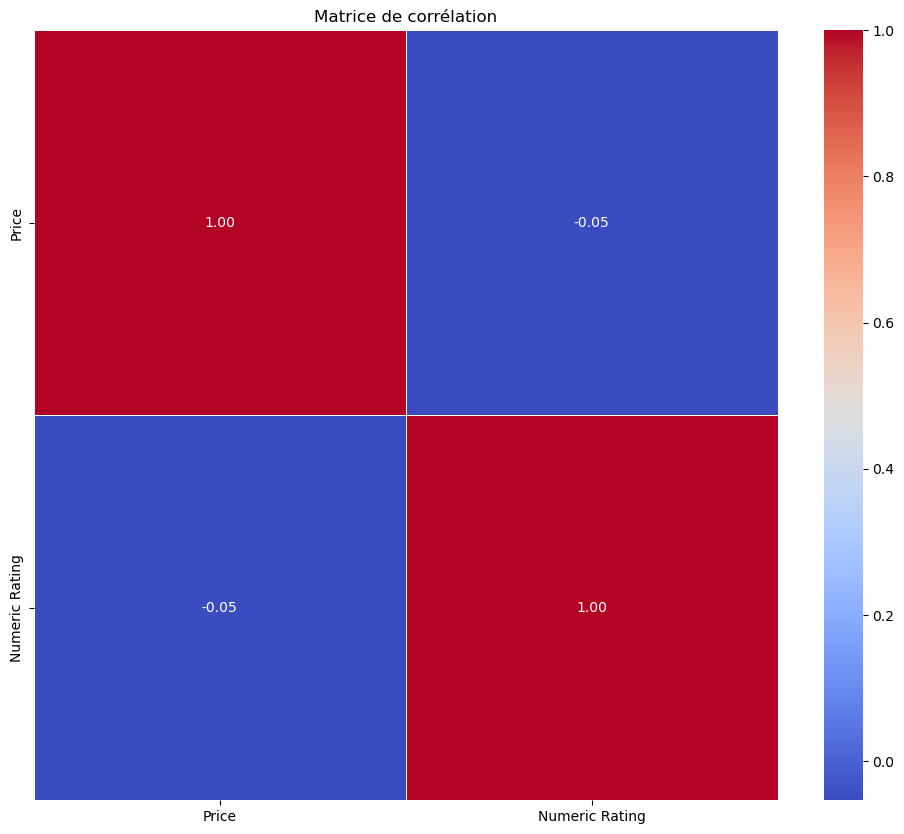

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Charger les données

# Distribution des prix
/plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Price', bins=30, kde=True)
plt.title('Distribution des prix')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.show()

# Nuage de points entre le prix et la note
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Numeric Rating', hue='Sub Category', palette='viridis')
plt.title('Nuage de points : Prix vs. Note')
plt.xlabel('Prix')
plt.ylabel('Note Numérique')
plt.legend(title='Catégorie')
plt.show()

# Boîte à moustaches pour la note en fonction de la catégorie
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Sub Category', y='Numeric Rating')
plt.title('Boîte à moustaches : Note en fonction de la catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Note Numérique')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()

# Sélectionner les colonnes numériques pour le heatmap
numeric_columns = df.select_dtypes(include=['float64']).columns

# Calculer la matrice de corrélation
correlation_matrix = df[numeric_columns].corr()

# Créer le heatmap avec Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de corrélation')
plt.show()


In [102]:
# Sélection des colonnes pertinentes
X = df[['Price', 'Sub Category']]
y = df['Numeric Rating']

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Prétraitement : Encodage one-hot pour la colonne 'sub category'
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), ['Sub Category'])],
    remainder='passthrough'
)

# Création du pipeline avec le prétraitement et le modèle de régression linéaire
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Création du pipeline avec le prétraitement et le modèle de forêt aléatoire
# model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', RandomForestRegressor())
# ])

# Création du pipeline avec le prétraitement et le modèle XGBoost
# model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', XGBRegressor())
# ])

#  Création du pipeline avec le prétraitement et le modèle SVM avec noyau RBF
# model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', SVR(kernel='rbf'))
# ])

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# Entraînement du modèle
model.fit(X_train, y_train)

In [ ]:
# visualize the accuracy and the classification report
# print('accuracy %s' % accuracy_score(y_pred, y_test))
# print(classification_report(y_test, y_pred,target_names=my_tags))

# # Évaluation des performances
# mse = mean_squared_error(y_test, model.predict(X_test))
# print(f"Mean Squared Error: {mse}")

# # Prédiction sur de nouvelles données
# new_data = pd.DataFrame({'Price': [60], 'Sub Category': ['Bakery & Desserts']})
# new_data
# predicted_rating = model.predict(new_data)
# print(f"Predicted Rating: {predicted_rating}")

In [ ]:
# Test du model #
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Making predictions using the test data
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

In [ ]:
# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Tracer la ligne de régression
plt.scatter(X_test['Price'], y_test, color='black', label='True values')
plt.scatter(X_test['Price'], y_pred, color='blue', label='Predicted values')

# Ajouter la ligne de régression
# plt.plot(X_test['Price'], y_pred, color='red', linewidth=1, label='Regression Line')

# Ajouter des labels et une légende
plt.xlabel('Price')
plt.ylabel('Numerical Rating')
plt.legend()

# Afficher le graphique
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

### What do you observe ? 
There are the same number of elements in each class. The classes are balanced. (https://towardsdatascience.com/why-balancing-classes-is-over-hyped-e382a8a410f7)

## Text Pre-processing
Create a function <b>'clean_words'</b>, which will contain methods to remove different types of noise from the words.

In [ ]:


def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'\W', ' ', text)
    # Tokenization and Remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = nltk.word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(word) for word in filtered_text]
    return ' '.join(lemmatized_text)
 
# Apply to dataset and visualize the result with an example
df['Product Description'] = df['Product Description'].apply(clean_text)
print_plot(10)

In [ ]:
# Word count after the pre-processing
df['post'].apply(lambda x: len(x.split(' '))).sum()

In [ ]:
# Split the data into train and test datasets 
# X = df.post
# y = df.tags
# Assuming 'Price' is your independent variable and 'Numeric Rating' is your dependent variable
X = meat_seafood_data[['Price']]  # Independent variable
y = meat_seafood_data['Numeric Rating']  # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

## Classification

### Naive Bayes Classifier for Multinomial Models

In [ ]:
#Build a pipeline with the MultinomialNB model
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
# train the model
nb.fit(X_train, y_train)

# Store the prediction iin a variable y_pred
y_pred = nb.predict(X_test)

# visualize the accuracy and the classification report
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

### Support vertor Machine 

In [ ]:
#Build a pipeline with the SGDClassifier model with the following parameters: loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
# train the model
sgd.fit(X_train, y_train)

# Store the prediction iin a variable y_pred
y_pred = sgd.predict(X_test)

# visualize the accuracy and the classification report
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

### Logistic Regression

In [ ]:
#Build a pipeline with the LogisticRegression model with the following parameters: n_jobs=1, C=1e5
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
# train the model
logreg.fit(X_train, y_train)

# Store the prediction iin a variable y_pred
y_pred = logreg.predict(X_test)

# visualize the accuracy and the classification report
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Sélectionner les caractéristiques et la variable cible
X = df.drop(['Has_Discount', 'Rating', 'Numeric Rating','Discount'], axis=1)  # Exclure les colonnes non nécessaires
y = df['Has_Discount']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un preprocessor pour traiter les variables catégorielles
preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), X.select_dtypes(include=['object']).columns),
    remainder='passthrough'
)

# Créer et entraîner un modèle de classification (Random Forest par exemple)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(preprocessor.fit_transform(X_train), y_train)

# Faire des prédictions sur l'ensemble de test
predictions = classifier.predict(preprocessor.transform(X_test))

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_report(y_test, predictions))


Accuracy: 0.9373134328358209

Confusion Matrix:
[[312   0]
 [ 21   2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       312
           1       1.00      0.09      0.16        23

    accuracy                           0.94       335
   macro avg       0.97      0.54      0.56       335
weighted avg       0.94      0.94      0.91       335



#### Comment and compare the results.
Can you build a better model using another algorithm?

In [106]:
df['Discount'].unique()

array(['No Discount', 'After $30 OFF', 'After $5 OFF',
       'This item is not returnable.', 'After $20 OFF', 'After $4.50 OFF',
       'After $4 OFF', 'After $2.80 OFF', 'After $8 OFF',
       'After $3.60 OFF', 'After $3 OFF', 'After $1.50 OFF',
       'After $3.30 OFF', 'After $6 OFF', 'After $2.40 OFF',
       'After $2.20 OFF', 'After $12 OFF', 'After $3.10 OFF',
       'After $5.60 OFF', 'After $2.70 OFF', 'After $10 OFF',
       'After $9.30 OFF', 'After $50 OFF', 'After $2.50 OFF',
       'After $70 OFF', 'After $60 OFF', 'After $40 - $80 OFF',
       'After $40 - $70 OFF', 'After $40 OFF', 'After $80 OFF',
       'After $3.50 OFF', 'Limit 1 Per Member', 'Limit 5 Per Member',
       'After $6.50 OFF', 'After $3.80 OFF', 'After $2.60 OFF',
       'After $7 OFF', 'After $4.10 OFF', 'After $2 OFF',
       'After $2.30 OFF'], dtype=object)